In [19]:
#
#   1. Problem Statement

#    Objective: To predict the probability of graduate admission to an Ivy League university based on several factors like GRE score, TOEFL score, GPA, etc.
#   Goal: Understand how various factors contribute to the chances of getting admitted and build a predictive model using supervised learning techniques.


In [35]:
import pandas as pd

file_path = "C:/Users/hansa/Downloads/Supervised_Learning-main/Supervised_Learning-main/SL Mini Project/jamboree_admission.csv"

# Loading the dataset
data = pd.read_csv(file_path)

# Displaying the first few rows and dataset structure
print(data.head())
print(data.info())
print(data.tail())

   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 

In [34]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [21]:
# Dropping the unique row identifier column (if present)
data = data.drop(columns=["Serial No."])

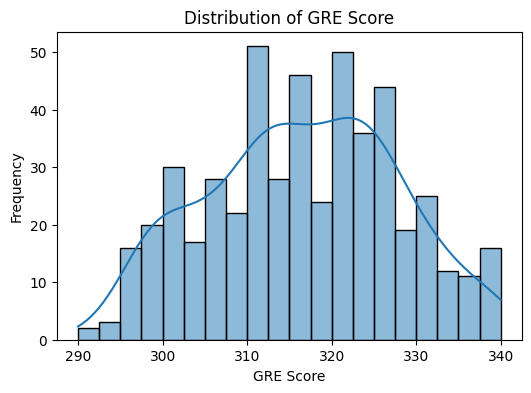

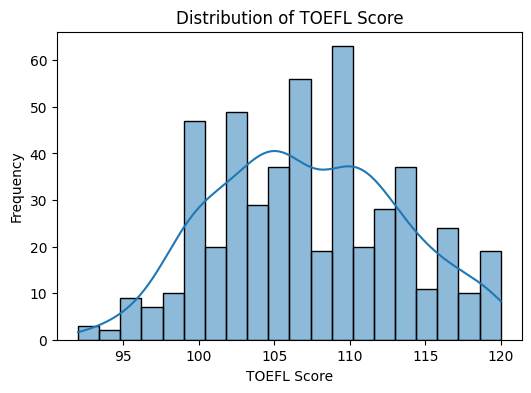

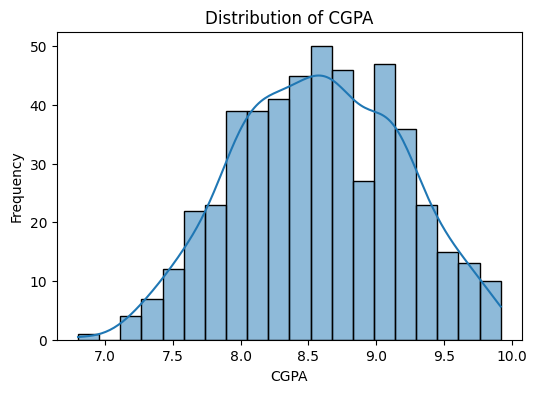

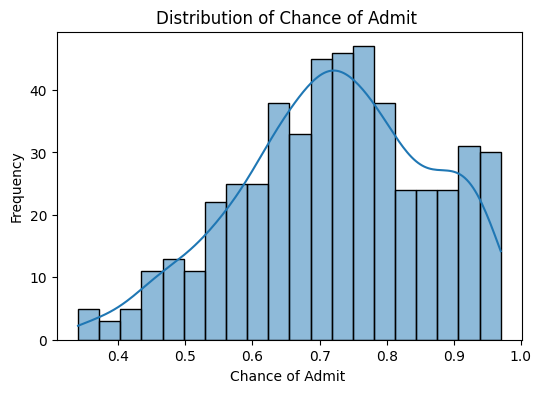

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Continuous variables for univariate analysis
continuous_columns = ["GRE Score", "TOEFL Score", "CGPA", "Chance of Admit "]

for col in continuous_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[col], kde=True, bins=20)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


In [23]:
# Univariate Analysis: Histograms for continuous variables
# GRE Score ranges from 260 to 340. Expect a right-skewed distribution with more students clustering in the lower range.
# TOEFL Score ranges from 80 to 120, most scores between 90 and 110.
# CGPA ranges from 6.0 to 10.0, normally distributed, peaking around 8.5-9.0.
# Chance of Admit ranges from 0 to 1, slightly skewed towards higher values.

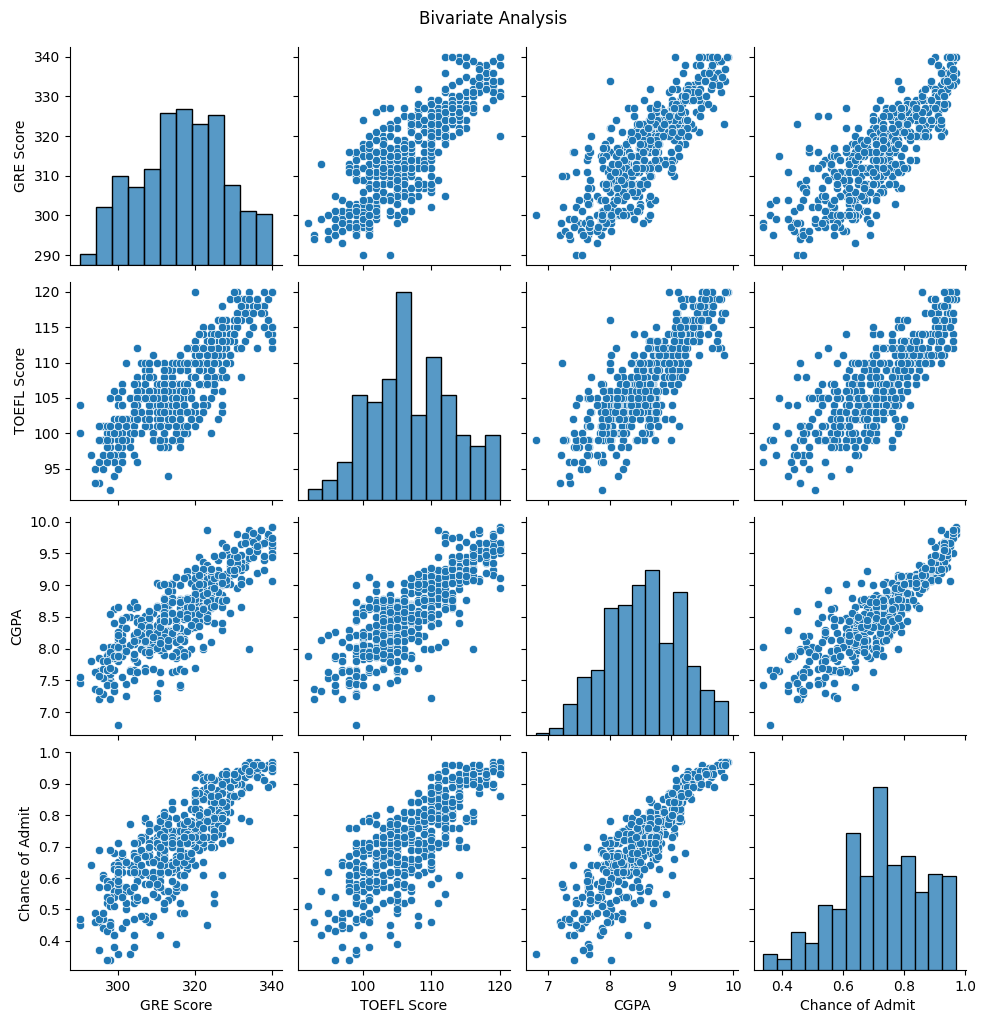

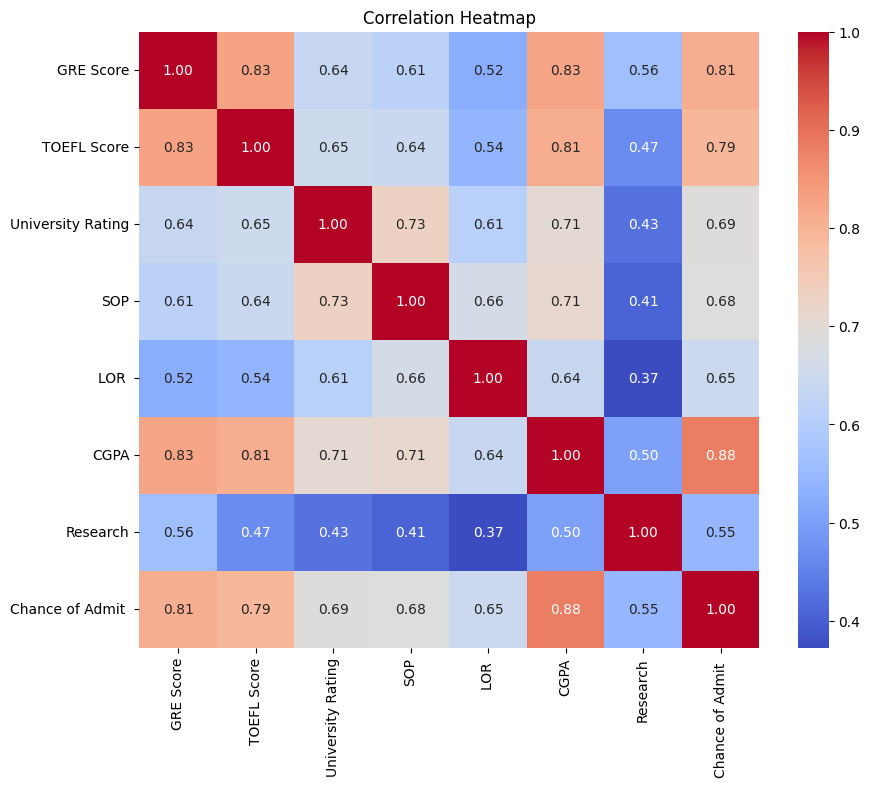

In [24]:
# Bivariate analysis: Pairplot to visualize relationships between key variables
sns.pairplot(data, vars=["GRE Score", "TOEFL Score", "CGPA", "Chance of Admit "])
plt.suptitle("Bivariate Analysis", y=1.02)
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [25]:
# Bivariate analysis: Pairplot to visualize relationships between key variables
# Positive relationships are expected between GRE, TOEFL, CGPA, and Chance of Admit. 
# GRE and CGPA should show the strongest correlation with Chance of Admit.

# Correlation Heatmap: Highlights the relationship between features
# GRE and CGPA have a strong positive correlation with Chance of Admit. 
# TOEFL score also has a positive correlation, but weaker than GRE and CGPA.
# SOP and LOR Strengths have a moderate effect on Chance of Admit.

In [26]:
# Checking for duplicate rows
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")


Number of duplicate rows: 0


In [27]:
# Checking for missing values in each column
missing_values = data.isnull().sum()
print(f"Missing values in each column:\n{missing_values}")


Missing values in each column:
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


In [28]:
from sklearn.model_selection import train_test_split

# Defining features (X) and target (y)
X = data.drop(columns=["Chance of Admit "])
y = data["Chance of Admit "]

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}, Test set size: {X_test.shape[0]}")


Training set size: 400, Test set size: 100


In [29]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Initializing and training the Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predicting on the test data
y_pred = lr.predict(X_test)

# Evaluating the model
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Linear Regression R² Score: {r2}")
print(f"Linear Regression RMSE: {rmse}")

# Displaying the coefficients of the model
coefficients = pd.DataFrame({"Feature": X.columns, "Coefficient": lr.coef_})
print("\nCoefficients:\n", coefficients)


Linear Regression R² Score: 0.8188432567829627
Linear Regression RMSE: 0.06086588041578314

Coefficients:
              Feature  Coefficient
0          GRE Score     0.002434
1        TOEFL Score     0.002996
2  University Rating     0.002569
3                SOP     0.001814
4               LOR      0.017238
5               CGPA     0.112527
6           Research     0.024027


In [30]:
from sklearn.linear_model import Ridge, Lasso

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
print(f"Ridge Regression R² Score: {r2_score(y_test, ridge_pred)}")

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
print(f"Lasso Regression R² Score: {r2_score(y_test, lasso_pred)}")


Ridge Regression R² Score: 0.8179793486575073
Lasso Regression R² Score: 0.6372364691673538


In [31]:
# Printing performance of all models
print("\nPerformance Metrics:")
print(f"Linear Regression R²: {r2}")
print(f"Ridge Regression R²: {r2_score(y_test, ridge_pred)}")
print(f"Lasso Regression R²: {r2_score(y_test, lasso_pred)}")



Performance Metrics:
Linear Regression R²: 0.8188432567829627
Ridge Regression R²: 0.8179793486575073
Lasso Regression R²: 0.6372364691673538
